# __RBS BI Co-op Assignment__ 
## Food choices - College students' food and cooking preferences
 
### By Yitong Sun
#### 4/13/2021 Data Source: https://www.kaggle.com/borapajo/food-choices

***

## Data Overview and Cleaning

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
from scipy import stats
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
import re
warnings.filterwarnings('ignore')

In [226]:
df = pd.read_csv('food_coded.csv')
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [227]:
df.isnull().sum()

GPA                              2
Gender                           0
breakfast                        0
calories_chicken                 0
calories_day                    19
calories_scone                   1
coffee                           0
comfort_food                     1
comfort_food_reasons             1
comfort_food_reasons_coded      19
cook                             3
comfort_food_reasons_coded.1     0
cuisine                         17
diet_current                     1
diet_current_coded               0
drink                            2
eating_changes                   3
eating_changes_coded             0
eating_changes_coded1            0
eating_out                       0
employment                       9
ethnic_food                      0
exercise                        13
father_education                 1
father_profession                3
fav_cuisine                      2
fav_cuisine_coded                0
fav_food                         2
food_childhood      

In [228]:
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current_coded,drink,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,fav_cuisine_coded,fav_food,fries,fruit_day,grade_level,greek_food,healthy_feeling,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,mother_education,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,125.000000,123.000000,125.000000,125.000000,125.00000,116.000000,125.000000,112.000000,124.000000,125.000000,123.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,124.000000,125.000000,125.000000,124.000000,124.000000,122.000000,125.000000,124.000000,125.000000,125.000000,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,1.760000,1.560976,1.536000,4.552000,2.56000,2.448276,3.744000,1.589286,3.483871,2.424000,1.715447,1.088000,4.224000,2.376000,3.488000,5.456000,3.704000,4.532258,3.152000,4.728000,5.104839,1.500000,3.426230,3.152000,1.322581,1.528000,3.408000,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,0.766222,0.498298,0.757159,2.547788,1.13876,0.533158,1.177093,0.665137,1.206243,1.947968,0.910056,0.284435,0.923388,1.133536,1.365567,2.585643,2.086918,1.456332,1.486802,0.587175,3.120399,0.548464,1.170703,1.205204,0.681323,0.746778,1.040285,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.00000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,3.000000,3.000000,2.000000,4.000000,2.000000,5.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,1.000000,4.000000,2.00000,2.000000,4.000000,1.000000,4.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,5.000000,3.000000,5.000000,3.000000,5.000000,5.000000,1.000000,4.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,2.000000,5.000000,3.00000,3.000000,5.000000,2.000000,4.000000,4.000000,3.000000,1.000000,5.000000,3.000000,5.000000,8.000000,6.000000,6.000000,5.000000,5.000000,8.000000,2.000000,4.000000,4.000000,1.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,4.000000,2.000000,4.000000,13.000000,5.00000,3.000000,5.000000,3.000000,5.000000,8.000000,3.000000,2.000000,5.000000,4.000000,5.000000,1

In [229]:
df.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

## Question 1 - How Does GPA Impact Employment?

In [280]:
df_1 = df[['GPA','Gender','employment','father_education','father_profession','income','mother_education','mother_profession']]

In [281]:
df_1.isnull().sum()
df_1 = df_1.dropna(subset = ['GPA','employment'])

In [282]:
df_1['GPA'] = pd.to_numeric(df_1['GPA'], errors='coerce')

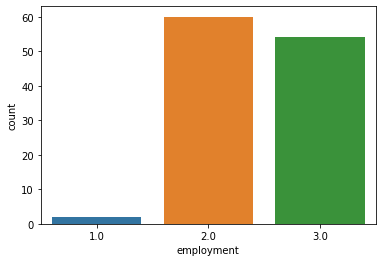

In [283]:
ax = sns.countplot(x="employment",  data=df)

In [284]:
df_1 = pd.concat([df_1, pd.get_dummies(df_1['employment'], drop_first = False)], axis = 1)
df_1.columns = ['GPA','Gender','employment','father_education','father_profession','income','mother_education','mother_profession','full_time','part_time','not_employed']

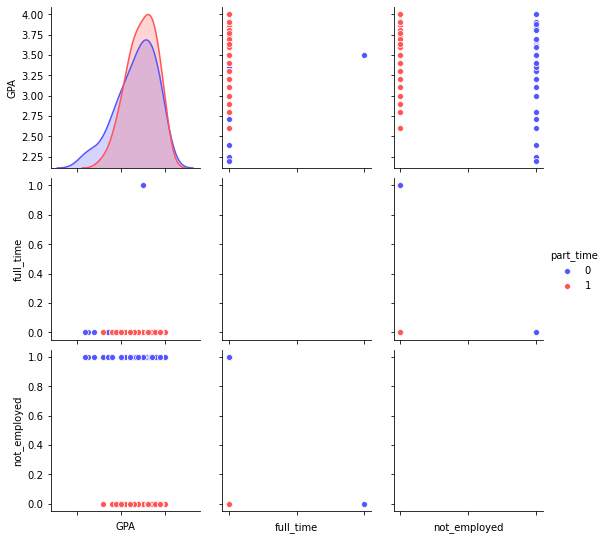

In [285]:
numerical = [u'GPA',u'full_time',u'part_time',u'not_employed']
g = sns.pairplot(df_1[numerical], hue='part_time', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])

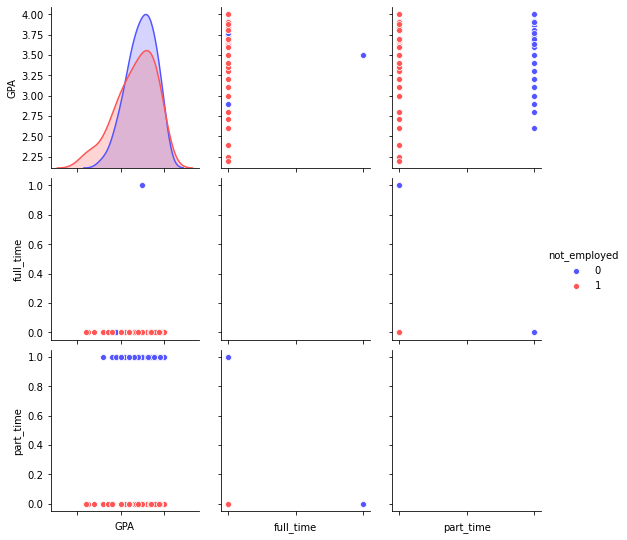

In [277]:
numerical = [u'GPA',u'full_time',u'part_time',u'not_employed']
g = sns.pairplot(df_1[numerical], hue='not_employed', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

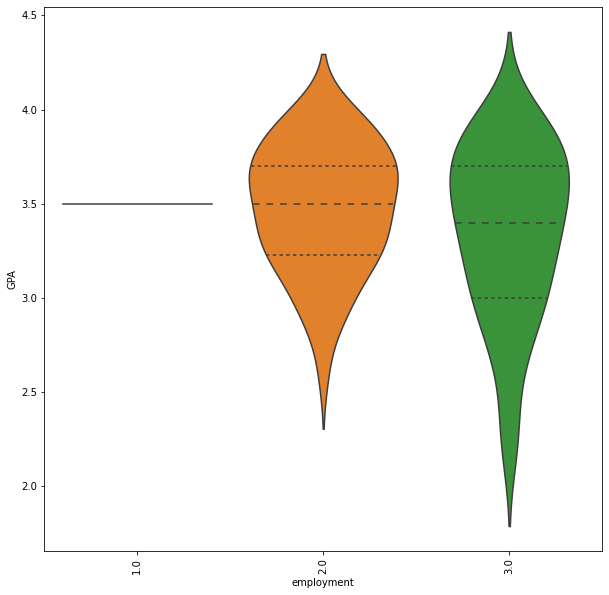

In [278]:
plt.figure(figsize=(10,10))
sns.violinplot(x=df_1["employment"], y=df_1["GPA"], data=df_1,split=True, inner="quart")
plt.xticks(rotation=90)

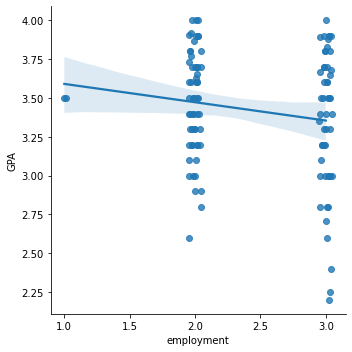

In [279]:
sns.lmplot(x="employment", y="GPA", data=df_1, x_jitter=.05);

## Question 2 - Evaluate "weight" Field

In [20]:
weight=sorted(df['weight'].dropna().to_list())
weight.remove('144 lbs') 
weight=weight[:-2]
weight= list(map(int, weight))

Data distribution of variable weight

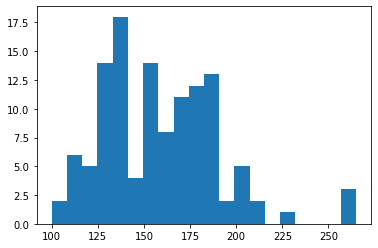

In [21]:
plt.hist(weight,bins=20)
plt.show()

The distribution law of variable weight after using logarithmic processing data

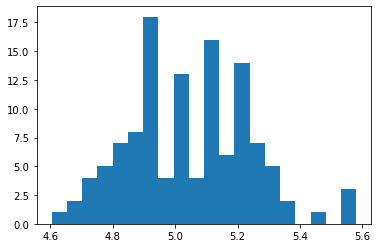

In [22]:
plt.hist(np.log(weight),bins=20)
plt.show()

## Qestion 3 - Potential Enhancement

Scholarships
<br>Students’ Free time, which can be used to explore the impact of free time on cooking habit, current diet, daily exercise and so on.
<br>Academic Pressure 


## Qestion 4 - Processing “comfort_food_reasons” Field

For the processing of comfort_food_reasons, dummy variables can be used, whether the student is boredom, stress, angry, etc. as comfort_food_reasons, and output as a table.

The specific data cleaning idea is as follows: read the comfort_food_reasons of different students, use split to decompose the text, and calculate whether comfort_food_reasons appear in the comfort_food_reasons according to different emotions such as "sad", "stress" and other keywords. If they exist, record the dummy variable of the emotion as 1.

In [23]:
whether_boredom=[]
whether_stress=[]
whether_sad=[]
whether_anger=[]
for i in df['comfort_food_reasons'][:50].tolist():
    text=i.strip().lower()
    list_split=re.split('!| |,|&',text)
    if ('boredom'in list_split)or('bored'in list_split):
        whether_boredom.append(1)
    else:
        whether_boredom.append(0)            
    if ('stress'in list_split) or ('stressed'in list_split):
        whether_stress.append(1)
    else:
        whether_stress.append(0)
    if ('sad'in list_split) or ('sadness' in list_split) or ('upset' in list_split) or ('depression' in list_split):
        whether_sad.append(1)
    else:
        whether_sad.append(0)
    if ('anger') in list_split:
        whether_anger.append(1)
    else:
        whether_anger.append(0)        

In [24]:
df_q4=df[:50]
df_q4['whether_boredom']=whether_boredom
df_q4['whether_stress']=whether_stress
df_q4['whether_sad']=whether_sad
df_q4['whether_anger']=whether_anger

In [25]:
df_q4[['whether_boredom','whether_stress','whether_sad','whether_anger']].head()

,whether_boredom,whether_stress,whether_sad,whether_anger
0,0,0,0,0
1,1,1,0,1
2,0,1,1,0
3,1,0,0,0
4,1,1,0,0


According to the above table, we can record the reason as boredom as 2, the reason as sadness as 3, and the reason as stress as 1. The output effect is the same as comfort_food_reasons_coded

In [26]:
comfort_food_reasons_coded_1=[]
for i in df['comfort_food_reasons'][:50].tolist():
    text=i.strip().lower()
    list_split=re.split('!| |,|&',text)
    if (list_split[0]=='stress'):
        comfort_food_reasons_coded_1.append(1)
    elif (list_split[0]=='boredom'):
        comfort_food_reasons_coded_1.append(2)
    elif (list_split[0]=='depression') or (list_split[0]=="sadness"):
        comfort_food_reasons_coded_1.append(3)
    elif (list_split[0]=='hunger'):
        comfort_food_reasons_coded_1.append(4)
    elif (list_split[0]=='laziness'):
        comfort_food_reasons_coded_1.append(5)
    elif (list_split[0]=='hunger'):
        comfort_food_reasons_coded_1.append(6)
    elif (list_split[0]=='happeniness'):
        comfort_food_reasons_coded_1.append(7)
    elif (list_split[0]=='watching TV'):
        comfort_food_reasons_coded_1.append(8)
    else:
        comfort_food_reasons_coded_1.append(9)

In [27]:
df['comfort_food_reasons_coded'][:50]==comfort_food_reasons_coded_1

0      True
1      True
2      True
3      True
4      True
5     False
6      True
7     False
8      True
9      True
10     True
11     True
12     True
13     True
14    False
15     True
16     True
17    False
18     True
19     True
20    False
21    False
22     True
23     True
24    False
25     True
26     True
27     True
28    False
29     True
30     True
31    False
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40    False
41    False
42     True
43    False
44     True
45     True
46     True
47     True
48    False
49    False
Name: comfort_food_reasons_coded, dtype: bool

In addition, I cleaned the data according to what the first word of the text is, and compared the cleansing results with the comfort_food_reasons_coded in the data, and found that most of the methods I used were the same, and a few of the comfort_food_reasons_coded classified by the text appeared different.

##  Question 5

#### Part 1 - How Do Diets Impact GPA and Weight?

In [249]:
data_q5=df[["GPA","weight","diet_current_coded"]]

In [250]:
data_q5=data_q5.dropna(axis=0,how='any')

In [251]:
data_q5=data_q5.drop(index=[2, 3])

In [252]:
data_q5['GPA'] = pd.to_numeric(data_q5["GPA"],errors='coerce')
data_q5['weight'] = pd.to_numeric(data_q5["weight"],errors='coerce')
data_q5['diet_current_coded'] = pd.to_numeric(data_q5["diet_current_coded"],errors='coerce')

In [253]:
group1 = data_q5.groupby(['diet_current_coded'])

In [254]:
group1.agg('mean')

,GPA,weight
diet_current_coded,,
1,3.474146,152.571429
2,3.407382,161.857143
3,3.322222,158.333333
4,3.298000,185.000000


From the results, students with more scientific diets have better GPA and weight, students with more scientific diets have higher GPAs than students with unscientific diets, and the average weight is lower than those with unscientific diets.

#### Part 2 - Fligner’s Test

In [257]:
data_5=df_1.loc[:,['GPA','employment','Gender']].dropna()

Running normal test on GPA

In [258]:
print(stats.normaltest(data_5['GPA']))
#conformed normal distribution

NormaltestResult(statistic=11.528698403185958, pvalue=0.003137436538213642)


Running Fligner test on Gender

In [260]:
g_1=data_5[data_5['Gender']==1]['GPA']
g_2=data_5[data_5['Gender']==2]['GPA']
stats.fligner(g_1, g_2)
#doesn't exhibits statistical difference

FlignerResult(statistic=0.26218708367290294, pvalue=0.6086215649124465)

Running Flinger test on employment status

In [286]:
e_1=data_5[data_5['employment']==1]['GPA']
e_2=data_5[data_5['employment']==2]['GPA']
e_3=data_5[data_5['employment']==3]['GPA']

stats.fligner(e_1, e_2,e_3)
#exhibits statistical difference

FlignerResult(statistic=6.491998536945546, pvalue=0.038929643748800945)

#### Part 3 - Word Cloud

favorite cuisine is?

In [213]:
df_Q5_2 = df['fav_cuisine_coded'].dropna().value_counts()
df_Q5_2 = df_Q5_2.to_frame().set_index([pd.Index(['Italian/French/Greek', 'Asian/Chineses/Thai/Nepal', 'American', 'Spanish/Mexican','None', 'Indian','Arabic/Turkish', 'Jamaican', 'African'])])

In [214]:
df_Q5_2 = df['fav_cuisine_coded'].dropna().loc[~(df['fav_cuisine_coded']==0)]
df_Q5_2 = df_Q5_2.map({1: 'Mediterranean', 2: 'Mexican', 3: 'Arabic', 4: 'Asian', 5: 'American', 6:'African', 7:'Jamaican', 8: 'Indian'})

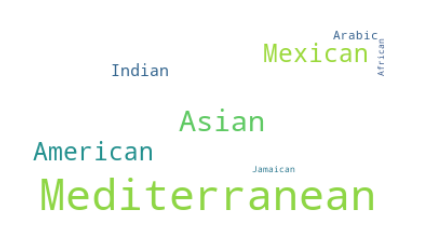

In [96]:
text = " ".join(i for i in df_Q5_2.astype(str))
wordcloud = WordCloud(background_color="white").generate(text)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

#### Part 3

In [113]:
df.loc[df['employment']==3.0][['employment','income']]

,employment,income
0,3.0,5.0
2,3.0,6.0
3,3.0,6.0
5,3.0,1.0
6,3.0,4.0
9,3.0,4.0
12,3.0,5.0
14,3.0,5.0
15,3.0,4.0
17,3.0,6.0


Values in 'income' column appear to be a bit suspicious, thus I will not include this variable in our OLS model.

#### Part 5 - Prepare for OLS Model

Data Cleaning

In [ ]:
df_GPA_OLS = df.drop(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'type_sports', 'veggies_day',
       'vitamins', 'waffle_calories', 'weight'],
      dtype='object'

Heat map - check for multicollinearity issue

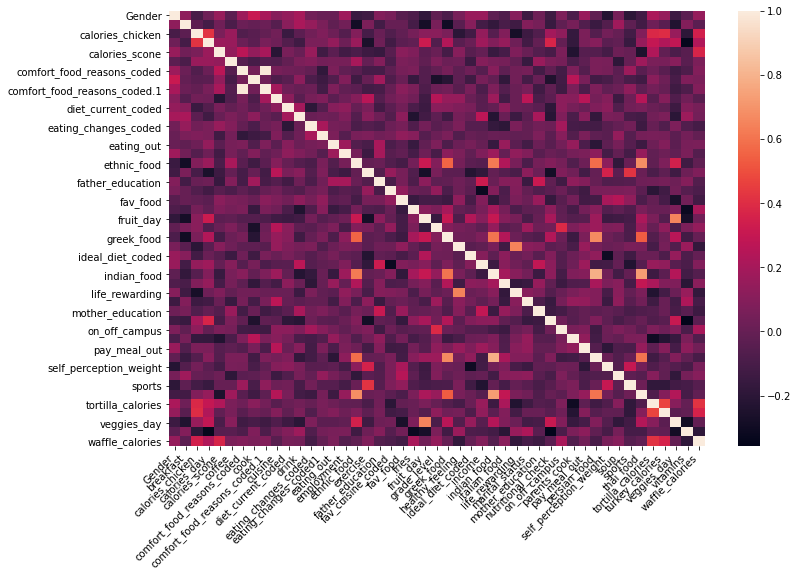

In [114]:
plt.figure(figsize = (12,8))
corrplot = sns.heatmap(df.corr())
corrplot.set_xticklabels(corrplot.get_xticklabels(), rotation = 45, horizontalalignment = 'right') #For X axis labels
plt.show()

Export data for OLS model in R script

In [117]:
gpa_ols = pd.read_csv('gpa_ols.csv')
gpa_ols

,GPA,Gender,diet_current_coded,eating_changes_coded,employment,on_off_campus,sports,vitamins,weight
0,2.400,0,1,1,0,1,1,1,187
1,3.654,1,0,1,1,1,1,0,155
2,3.500,1,0,3,1,1,1,0,190
3,2.250,1,0,1,0,1,0,0,190
4,3.800,0,0,2,0,0,1,1,180
...,...,...,...,...,...,...,...,...,...
91,3.200,0,0,2,1,1,1,0,185
92,3.500,1,0,1,1,0,1,1,156
93,3.882,1,0,1,0,1,0,0,120
94,3.000,0,1,1,1,1,0,1,135


***